# SVM
* SVM Implementation Using Pegasos 

- The final SVM Objective we derived was:
- L(w)=  1/2(W.T)W  +  c*Summation(max(0,1-ti))
- ti=yi(wT.xi+b)

# Generate Datasets

In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X,y= make_classification(n_samples=400,n_features=2,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=3)

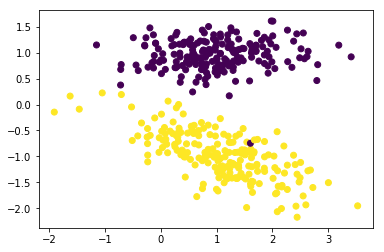

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

In [5]:
y[y==0]=-1

In [6]:
class SVM():
    def __init__(self,c=1.0):
        self.w=0.0
        self.b=0.0
        self.c=c
        
    def hinge_loss(self,w,b,x,y):
        loss=.5*np.dot(w,w.T)
        
        for i in range(x.shape[0]):
            ti=y[i]*(np.dot(w,x[i].T)+b)
            loss+=max(0,(self.c)*(1-ti))
        
        return loss[0][0]
    
    def fit(self,X,y,lr=.001,max_itr=80):
        
        n = X.shape[1]
        m = X.shape[0]
        
        w=np.zeros((1,n))
        b=0.0
        
        losses=[]
        
        for p in range(max_itr):
            l=self.hinge_loss(w,b,X,y)
            losses.append(l)
            
            gradw=np.zeros((1,n))
            gradb=0.0
            
            for i in range(m):
                ti=y[i]*(np.dot(w,X[i].T)+b)
                if (ti<1):
                    gradw-=self.c*y[i]*X[i]
                    gradb-=self.c*y[i]
            
            w=w-lr*gradw
            b=b-lr*gradb
        
        self.w=w
        self.b=b
        
        return w,b,losses
        

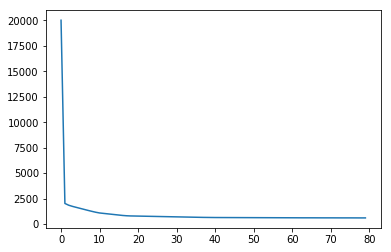

In [14]:
model=SVM(c=50)
W,b,losses=model.fit(X,y)
plt.plot(losses)

In [15]:
W,b

(array([[ -4.8511203, -16.5971711]]), 2.5999999999999996)

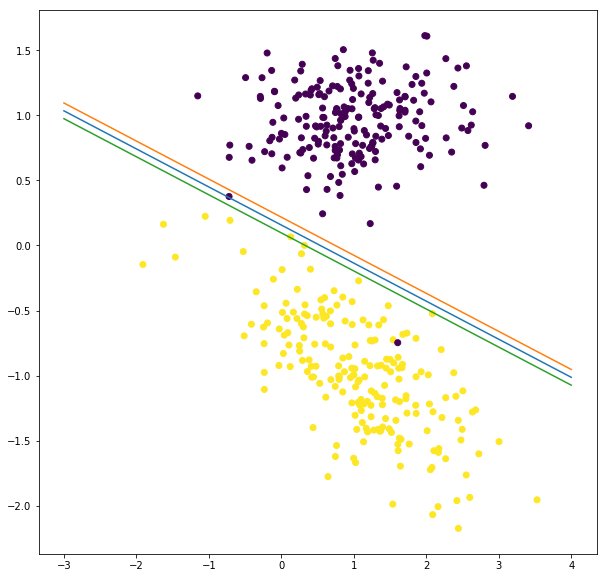

In [23]:
def hyperplane(X,y,w1,w2,b):
    x_1=np.linspace(-3,4,30)
    x_2=-1*(w1*x_1+b)/w2
    x_p=-1*(w1*x_1+b+1)/w2
    x_n=-1*(w1*x_1+b-1)/w2
    
    plt.figure(figsize=(10,10))
   
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.plot(x_1,x_2)
    plt.plot(x_1,x_p)
    plt.plot(x_1,x_n)
    

hyperplane(X,y,W[0][0],W[0][1],b)

plt.show()